LOAD DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
import pandas as pd

# Membaca file CSV dengan encoding ISO-8859-1
df = pd.read_csv('/content/laptop_price.csv', encoding='ISO-8859-1')
print(df.head())


   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.shape

(1303, 13)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
# menghilangkan kolom yang tidak diperlukan
df.drop(columns=['laptop_ID'],inplace=True)


In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
# menghilangkan GB pada Ram & kg pada Weight
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


DATA PREPROCESSING & DATA CLEANING

In [ ]:
# convert tipe data pada kolom Ram menjadi int32 & Weight menjadi float32
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(8)
memory usage: 122.3+ KB


In [ ]:
# menghilangkan var yang tidak digunakan
df.drop(columns=['Product'],inplace=True)

EDA (Exploratory Data Analysis)

<ipython-input-229-d9565591d297>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

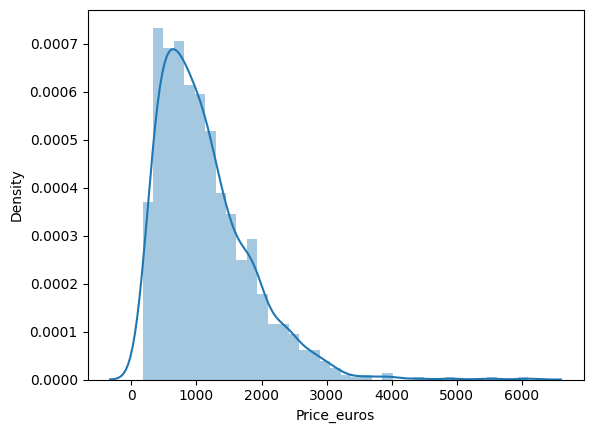

In [ ]:
# Analisis var harga
sns.distplot(df['Price_euros'])

<Axes: xlabel='Company'>

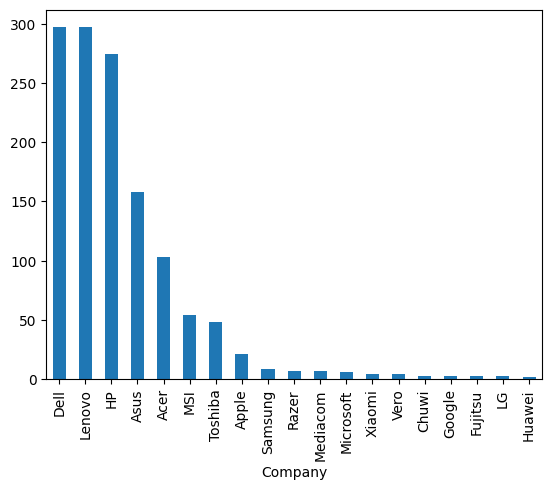

In [ ]:
# Analisis var company
df['Company'].value_counts().plot(kind='bar')

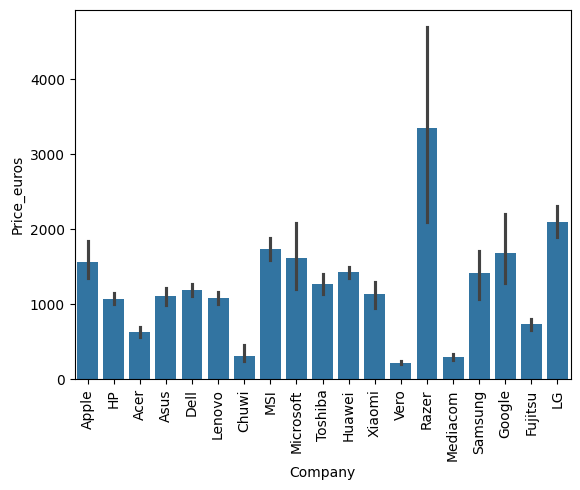

In [ ]:
# Analisis tiap brand
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

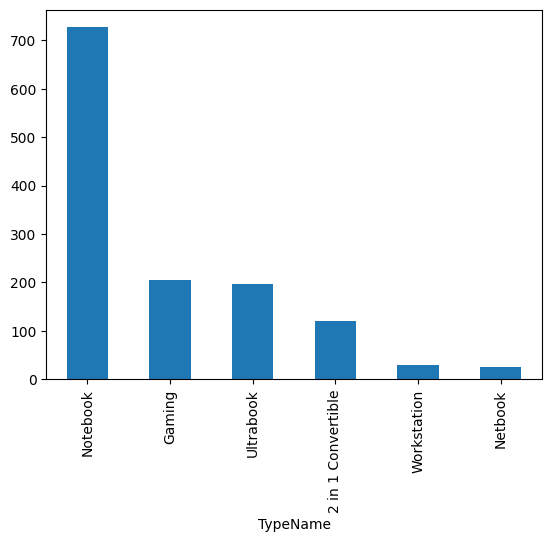

In [ ]:
# Analisis var typename
df['TypeName'].value_counts().plot(kind='bar')

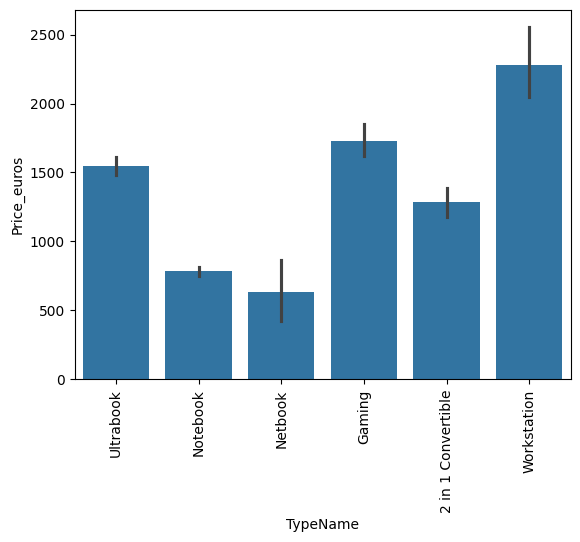

In [ ]:
# nilai rata-rata dari setiap jenis laptop
sns.barplot(x=df['TypeName'], y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-234-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

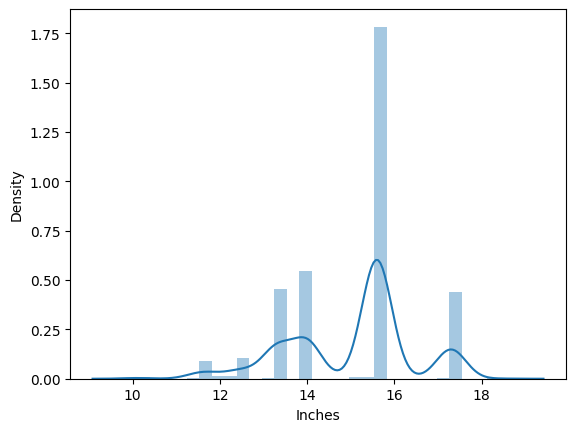

In [ ]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price_euros'>

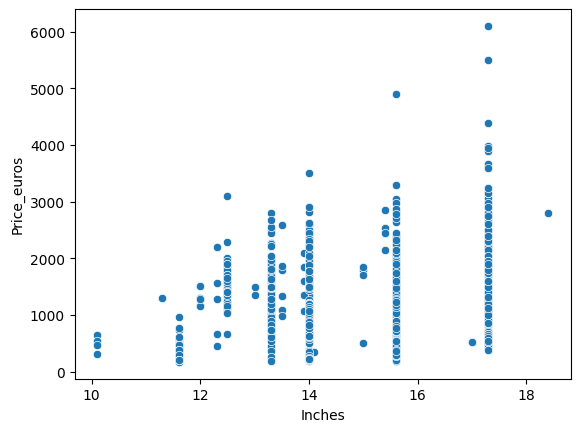

In [ ]:
sns.scatterplot(x=df['Inches'], y=df['Price_euros'])

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
# kolom baru dengan informasi touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
# menampilkan 5 data random
df.sample(5)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
1258,1276,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32,895.0,0
759,768,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.10,599.0,0
669,677,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Linux,2.10,412.0,0
1092,1107,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,1599.0,0
980,994,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD,Intel HD Graphics 620,Windows 10,2.19,1299.0,1


<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

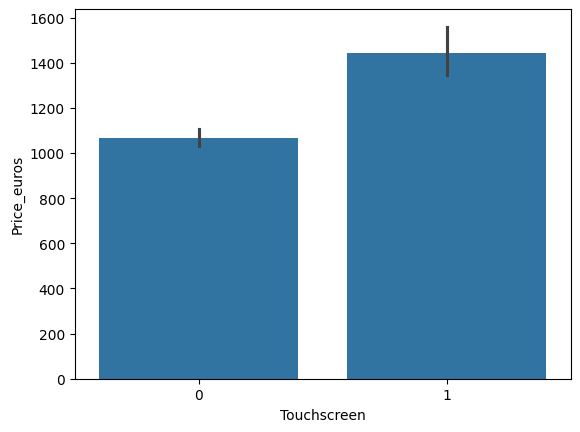

In [ ]:
sns.barplot(x=df['Touchscreen'], y=df['Price_euros'])

In [ ]:
# kolom baru dengan informasi IPS
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
# menampilkan 5 data sample
df.sample(5)


,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
1267,1285,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.3,805.99,0,0
54,55,Acer,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.4,384.00,0,0
623,630,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.2,799.00,0,0
1172,1190,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.2,369.00,0,0
1215,1233,Acer,Netbook,11.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2,32GB SSD,Intel HD Graphics,Chrome OS,1.3,174.00,0,0


<Axes: xlabel='Ips'>

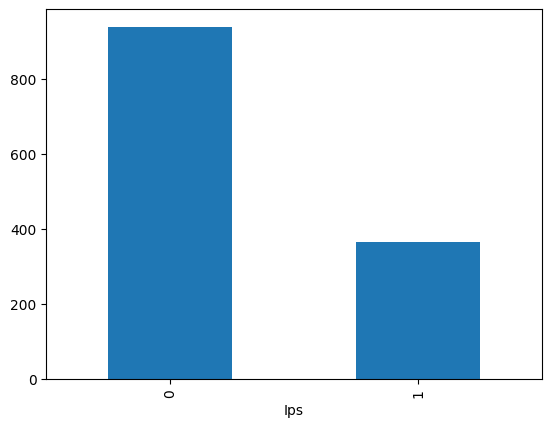

In [ ]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price_euros'>

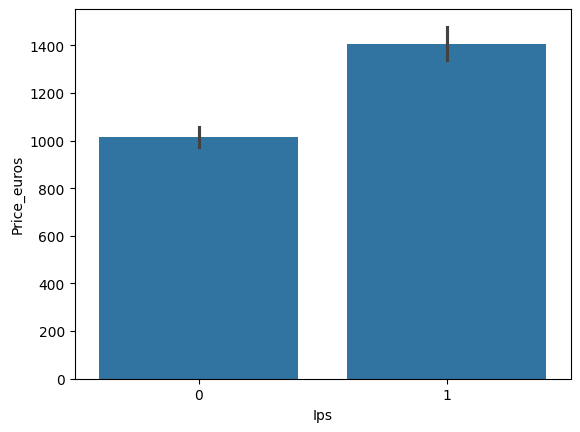

In [ ]:
sns.barplot(x=df['Ips'], y=df['Price_euros'])
#laptop dengan IPS lebih mahal

In [ ]:
# kolom baru untuk menampilkan Screen Resolution vertikal & horizontal
new = df['ScreenResolution'].str.split('x', n=1, expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.sample(5)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
356,362,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,No OS,2.20,321.99,0,0,1366,768
38,39,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,488.69,0,0,1366,768
439,446,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Linux,2.00,559.00,0,0,Full HD 1920,1080
1064,1079,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.80,1929.00,0,0,Full HD 1920,1080
976,990,Lenovo,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,508GB Hybrid,Intel HD Graphics 520,Windows 7,1.70,1002.00,0,0,1366,768


In [ ]:
# membersihkan data kolom X_res
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'\d+\.?\d+').apply(lambda x:x[0])
df.head()


,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [ ]:
# mengubah data type menjadi int
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_res             1303 non-null   int64  
 15  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64

In [ ]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Periksa apakah kolom 'Price_euros' ada
if 'Price_euros' in numeric_df.columns:
    # Hitung korelasi dengan kolom 'Price_euros'
    korelasi = numeric_df.corr()['Price_euros']
    print(korelasi)
else:
    print("'Price_euros' bukan kolom numerik.")


laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64


In [ ]:
# Check the data types of the columns
print(df.dtypes)

# Convert non-numeric columns to numeric if necessary (e.g., using LabelEncoder for 'Apple', etc.)
from sklearn.preprocessing import LabelEncoder

# Example for encoding a categorical column 'Company' (which might have 'Apple' and other brands)
le = LabelEncoder()
df['Company_encoded'] = le.fit_transform(df['Company'])

# Recalculate correlation on numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
correlation_matrix = df[numeric_cols].corr()

# Show the correlation with 'Price_euros'
print(correlation_matrix['Price_euros'])


laptop_ID             int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price_euros         float64
Touchscreen           int64
Ips                   int64
X_res                 int64
Y_res                 int64
ppi                 float64
dtype: object
laptop_ID          0.067830
Inches             0.068197
Price_euros        1.000000
Touchscreen        0.191226
Ips                0.252208
X_res              0.556529
Y_res              0.552809
ppi                0.473487
Company_encoded    0.140371
Name: Price_euros, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Company' column contains string values like 'Apple', 'Dell', etc.
le = LabelEncoder()
df_clean['Company_encoded'] = le.fit_transform(df_clean['Company'])

# Select only numeric columns for correlation
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numeric columns
correlation_matrix = df_clean[numeric_cols].corr()

# Check the correlation with 'Price_euros'
print(correlation_matrix['Price_euros'])


laptop_ID          0.067830
Inches             0.068197
Price_euros        1.000000
Touchscreen        0.191226
Ips                0.252208
X_res              0.556529
Y_res              0.552809
ppi                0.473487
Company_encoded    0.140371
Name: Price_euros, dtype: float64


In [ ]:
# Cek nama-nama kolom yang ada
print(df.columns)


Index(['laptop_ID', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Touchscreen',
       'Ips', 'X_res', 'Y_res', 'ppi', 'Company_encoded'],
      dtype='object')


In [ ]:
# Periksa apakah kolom 'ScreenResolution' ada dalam DataFrame
if 'ScreenResolution' in df.columns:
    df.drop(columns=['ScreenResolution'], inplace=True)
else:
    print("'ScreenResolution' tidak ditemukan dalam DataFrame")


In [ ]:
# hapus kolom Inches, X_res, Y_res
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)
df.head()


,laptop_ID,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Company_encoded
0,1,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,1
1,2,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,1
2,3,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,7
3,4,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,1
4,5,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,1


In [ ]:
# Cek tipe data kolom 'Cpu'
print(df['Cpu'].dtype)

# Tambahkan kolom 'Cpu Name' dengan memastikan nilai 'Cpu' berupa string
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(str(x).split()[0:3]))


object


In [ ]:
# Tambahkan kolom 'Cpu Name' dengan memastikan nilai 'Cpu' adalah string
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(str(x).split()[0:3]))

# Tambahkan kolom 'Cpu Name' dengan pengecekan tipe data
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(str(x).split()[0:3]) if isinstance(x, str) else str(x))


In [ ]:
# Drop columns only if they exist
columns_to_drop = ['Inches', 'X_res', 'Y_res']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Check the first few rows to confirm
df.head()


,laptop_ID,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Company_encoded,Cpu Name
0,1,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,1,Intel Core i5
1,2,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,1,Intel Core i5
2,3,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,7,Intel Core i5
3,4,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,1,Intel Core i7
4,5,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,1,Intel Core i5


In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [ ]:

# memilah jenis processor laptop
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()


,laptop_ID,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Company_encoded,Cpu Name,Cpu Brand
0,1,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,1,Intel Core i5,Intel Core i5
1,2,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,1,Intel Core i5,Intel Core i5
2,3,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,7,Intel Core i5,Intel Core i5
3,4,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,1,Intel Core i7,Intel Core i7
4,5,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,1,Intel Core i5,Intel Core i5


In [ ]:
# Periksa jumlah kemunculan setiap nilai dalam kolom 'Cpu Brand'
print(df['Cpu Brand'].value_counts())


Cpu Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64


<Axes: xlabel='Cpu Brand'>

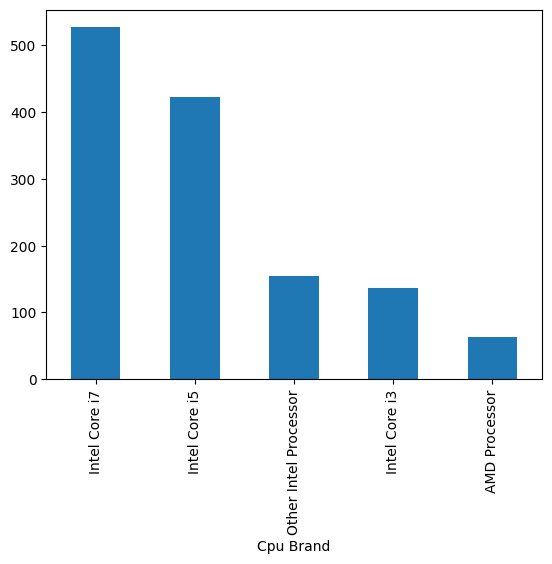

In [ ]:
df['Cpu Brand'].value_counts().plot(kind='bar')

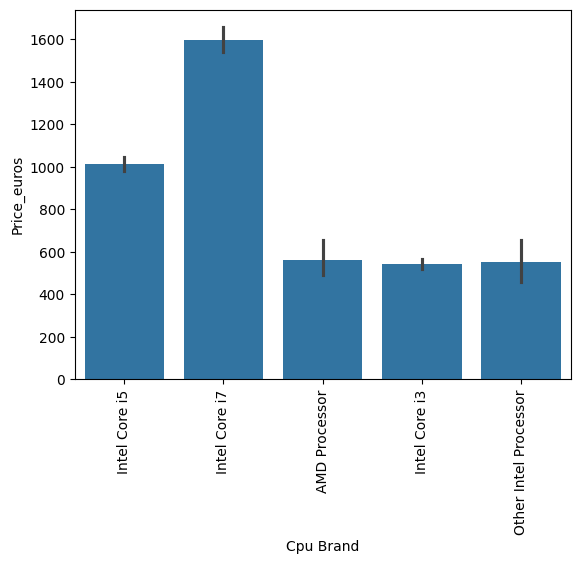

In [ ]:

sns.barplot(x=df['Cpu Brand'], y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# menghapus colom Cpu dan Cpu Name
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)
df.head()

,laptop_ID,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Company_encoded,Cpu Brand
0,1,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,1,Intel Core i5
1,2,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,1,Intel Core i5
2,3,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,7,Intel Core i5
3,4,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,1,Intel Core i7
4,5,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,1,Intel Core i5


<Axes: xlabel='Ram'>

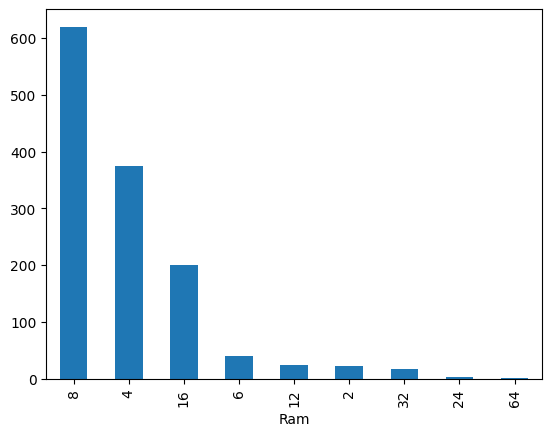

In [ ]:

df['Ram'].value_counts().plot(kind='bar')

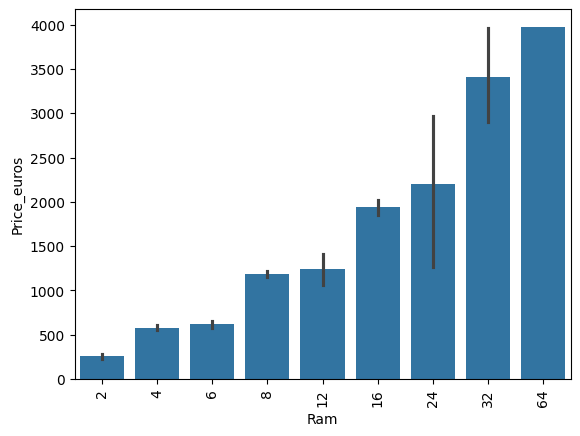

In [ ]:
sns.barplot(x=df['Ram'], y=df['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:

df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [ ]:
print(df.columns)


Index(['laptop_ID', 'Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price_euros', 'Touchscreen', 'Ips', 'ppi', 'Company_encoded',
       'Cpu Brand'],
      dtype='object')


In [ ]:
new = df["Memory"].str.split("+", n=1, expand=True)
print(new.head())


                     0     1
0            128GB SSD  None
1  128GB Flash Storage  None
2            256GB SSD  None
3            512GB SSD  None
4            256GB SSD  None


In [ ]:
# Remove non-numeric characters and convert to integer
df['first'] = df['first'].str.replace(r'\D', '', regex=True)  # Keep only numeric characters
df['first'] = df['first'].astype(int)

# Repeat the process for the 'second' column if necessary
df['second'] = df['second'].str.replace(r'\D', '', regex=True)
df['second'] = df['second'].astype(int)

# Check the DataFrame
df.head()


,laptop_ID,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,1,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,...,128,0,0,1,0,0,0,0,0,0
1,2,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,...,128,0,0,0,0,0,0,0,0,0
2,3,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,...,256,0,0,1,0,0,0,0,0,0
3,4,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,...,512,0,0,1,0,0,0,0,0,0
4,5,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,...,256,0,0,1,0,0,0,0,0,0


In [ ]:
#menghapus kolom memory
df.drop(columns=['Memory'], inplace=True)
df.head()


,laptop_ID,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,1,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,128,0,0,1,0,0,0,0,0,0
1,2,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,...,128,0,0,0,0,0,0,0,0,0
2,3,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,256,0,0,1,0,0,0,0,0,0
3,4,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,512,0,0,1,0,0,0,0,0,0
4,5,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,256,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk kolom 'Cpu Brand'
encoder = LabelEncoder()
df['Cpu Brand'] = encoder.fit_transform(df['Cpu Brand'])

# Sekarang kita dapat menghitung korelasi
numerical_df = df.select_dtypes(include=['number'])
correlation = numerical_df.corr()['Price_euros']

print(correlation)


laptop_ID              0.067830
Ram                    0.743007
Weight                 0.210370
Price_euros            1.000000
Touchscreen            0.191226
Ips                    0.252208
ppi                    0.473487
Company_encoded        0.140371
Cpu Brand              0.246240
first                 -0.122365
second                 0.295004
Layer1HDD             -0.426121
Layer1SSD              0.513609
Layer1Hybrid          -0.039386
Layer1Flash_Storage         NaN
Layer2HDD              0.298374
Layer2SSD              0.023611
Layer2Hybrid           0.105004
Layer2Flash_Storage         NaN
Name: Price_euros, dtype: float64


In [ ]:
# Hapus kolom jika ada
cols_to_drop = ['Hybrid', 'Flash_Storage']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Tampilkan data setelah penghapusan
df.head()


,laptop_ID,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,1,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,128,0,0,1,0,0,0,0,0,0
1,2,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,...,128,0,0,0,0,0,0,0,0,0
2,3,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,256,0,0,1,0,0,0,0,0,0
3,4,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,512,0,0,1,0,0,0,0,0,0
4,5,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,256,0,0,1,0,0,0,0,0,0


In [ ]:
df['Gpu'].value_counts()


,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [ ]:
# Pastikan kolom Gpu adalah tipe string
df['Gpu Brand'] = df['Gpu'].astype(str).apply(lambda x: x.split()[0])
df.head()



,laptop_ID,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,...,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Gpu Brand
0,1,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,0,0,1,0,0,0,0,0,0,Intel
1,2,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,...,0,0,0,0,0,0,0,0,0,Intel
2,3,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,0,0,1,0,0,0,0,0,0,Intel
3,4,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,0,0,1,0,0,0,0,0,0,AMD
4,5,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,0,0,1,0,0,0,0,0,0,Intel


In [ ]:
df['Gpu Brand'].value_counts()

,count
Gpu Brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


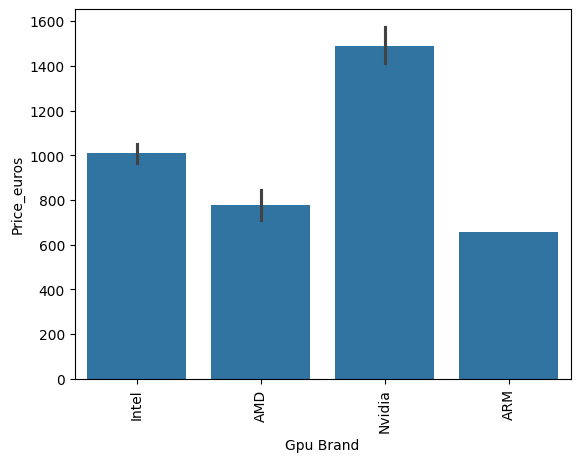

In [ ]:
sns.barplot(x = df['Gpu Brand'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
# menghapus kolom Gpu
df.drop(columns=['Gpu'], inplace=True)
df.head()


,laptop_ID,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,...,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Gpu Brand
0,1,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,...,0,0,1,0,0,0,0,0,0,Intel
1,2,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,...,0,0,0,0,0,0,0,0,0,Intel
2,3,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,...,0,0,1,0,0,0,0,0,0,Intel
3,4,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,...,0,0,1,0,0,0,0,0,0,AMD
4,5,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,...,0,0,1,0,0,0,0,0,0,Intel


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


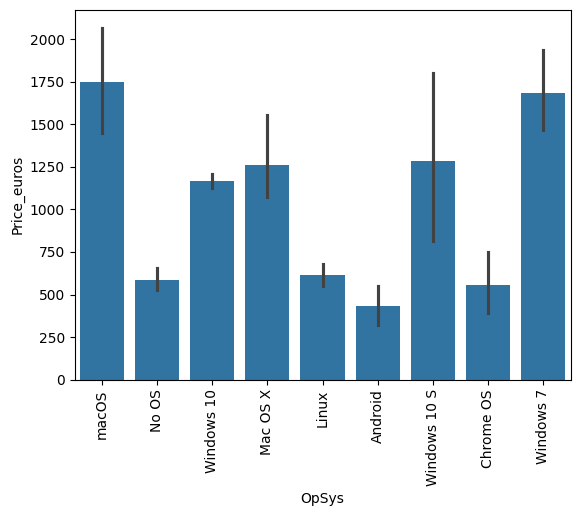

In [ ]:
sns.barplot(x = df['OpSys'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Memilah jenis OS
def cat_os(inp) :
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X' :
    return 'Mac'
  else:
    return 'Others/NO OS/Linux'

df['os'] = df['OpSys'].apply(cat_os)
df.head()


,laptop_ID,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,...,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Gpu Brand,os
0,1,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,...,0,1,0,0,0,0,0,0,Intel,Mac
1,2,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,...,0,0,0,0,0,0,0,0,Intel,Mac
2,3,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,...,0,1,0,0,0,0,0,0,Intel,Others/NO OS/Linux
3,4,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,...,0,1,0,0,0,0,0,0,AMD,Mac
4,5,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,...,0,1,0,0,0,0,0,0,Intel,Mac


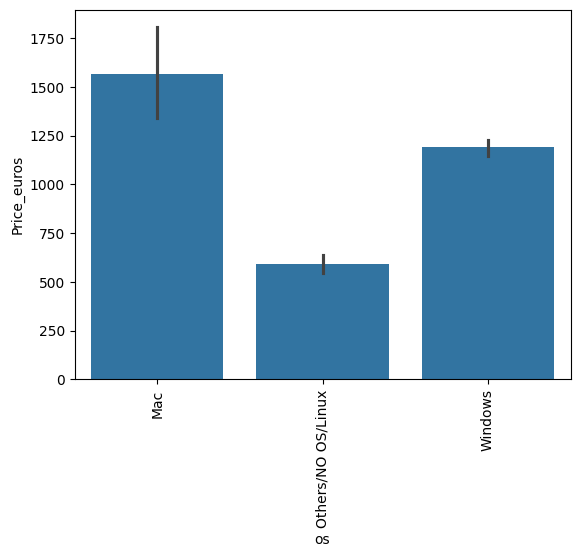

In [ ]:
# Menghapus kolom Gpu
df.drop(columns=['OpSys'], inplace=True)

#Menampilkan barplot operation system terhadap harga laptop
sns.barplot(x = df['os'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,laptop_ID,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,Ips,ppi,Company_encoded,...,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Gpu Brand,os
0,1,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,1,...,0,1,0,0,0,0,0,0,Intel,Mac
1,2,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,1,...,0,0,0,0,0,0,0,0,Intel,Mac
2,3,HP,Notebook,8,1.86,575.00,0,0,141.211998,7,...,0,1,0,0,0,0,0,0,Intel,Others/NO OS/Linux
3,4,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,1,...,0,1,0,0,0,0,0,0,AMD,Mac
4,5,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,1,...,0,1,0,0,0,0,0,0,Intel,Mac


<ipython-input-284-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

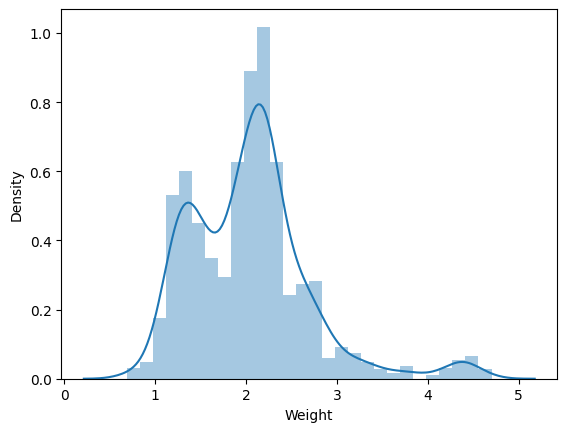

In [ ]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price_euros'>

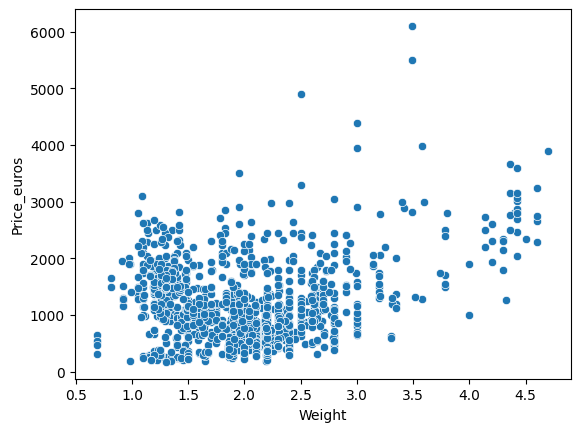

In [ ]:
sns.scatterplot(x = df['Weight'], y = df['Price_euros'])

In [ ]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Hitung korelasi terhadap harga (Price_euros)
correlation = df_numeric.corr()['Price_euros']

# Tampilkan hasil korelasi
print(correlation)


laptop_ID              0.067830
Ram                    0.743007
Weight                 0.210370
Price_euros            1.000000
Touchscreen            0.191226
Ips                    0.252208
ppi                    0.473487
Company_encoded        0.140371
Cpu Brand              0.246240
first                 -0.122365
second                 0.295004
Layer1HDD             -0.426121
Layer1SSD              0.513609
Layer1Hybrid          -0.039386
Layer1Flash_Storage         NaN
Layer2HDD              0.298374
Layer2SSD              0.023611
Layer2Hybrid           0.105004
Layer2Flash_Storage         NaN
Name: Price_euros, dtype: float64


<Axes: >

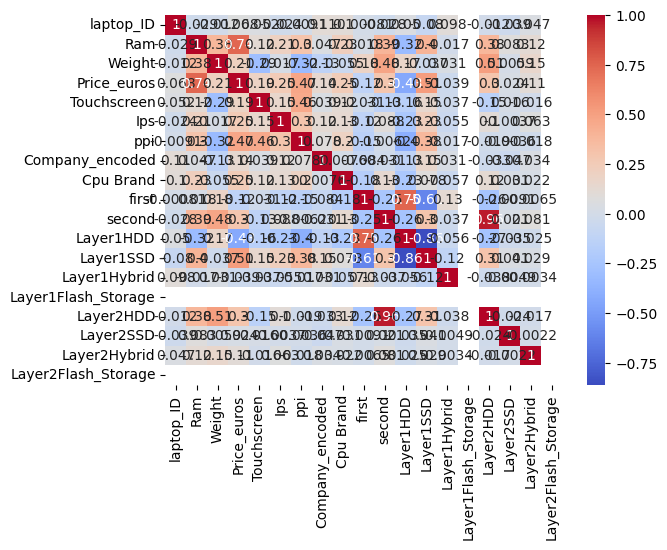

In [ ]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Buat heatmap korelasi
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')


<Axes: >

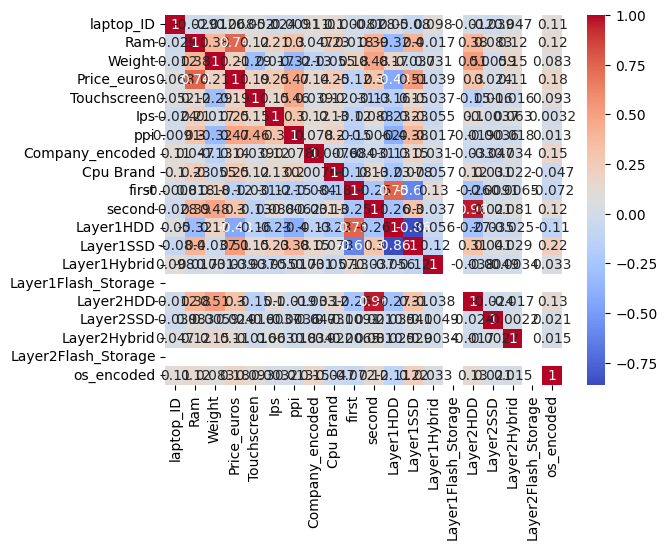

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Ubah kolom 'os' menjadi numerik
df['os_encoded'] = le.fit_transform(df['os'])

# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Buat heatmap korelasi
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')


<ipython-input-289-7250b54c5333>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price_euros']))


<Axes: xlabel='Price_euros', ylabel='Density'>

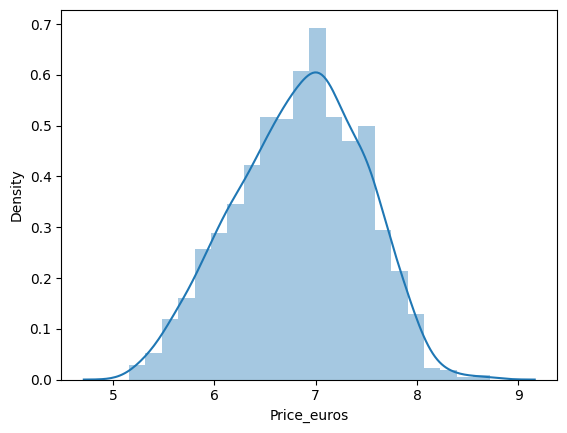

In [ ]:
sns.distplot(np.log(df['Price_euros']))

In [ ]:

# Menghapus kolom harga
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])
X

,laptop_ID,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Company_encoded,Cpu Brand,...,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Gpu Brand,os,os_encoded
0,1,Apple,Ultrabook,8,1.37,0,1,226.983005,1,2,...,1,0,0,0,0,0,0,Intel,Mac,0
1,2,Apple,Ultrabook,8,1.34,0,0,127.677940,1,2,...,0,0,0,0,0,0,0,Intel,Mac,0
2,3,HP,Notebook,8,1.86,0,0,141.211998,7,2,...,1,0,0,0,0,0,0,Intel,Others/NO OS/Linux,1
3,4,Apple,Ultrabook,16,1.83,0,1,220.534624,1,3,...,1,0,0,0,0,0,0,AMD,Mac,0
4,5,Apple,Ultrabook,8,1.37,0,1,226.983005,1,2,...,1,0,0,0,0,0,0,Intel,Mac,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,10,3,...,1,0,0,0,0,0,0,Intel,Windows,2
1299,1317,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,10,3,...,1,0,0,0,0,0,0,Intel,Windows,2
1300,1318,Lenovo,Notebook,2,1.50,0,0,111.935204,10,4,...,0,0,0,0,0,0,0,Intel,Windows,2
1301,1319,HP,Notebook,6,2.19,0,0,100.454670,7,3,...,0,0,0,0,0,0,0,AMD,Windows,2


In [ ]:
y

,Price_euros
0,7.200194
1,6.801216
2,6.354370
3,7.838915
4,7.497540
...,...
1298,6.458338
1299,7.312553
1300,5.433722
1301,6.638568


In [300]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=2)

X_train


,laptop_ID,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Company_encoded,Cpu Brand,...,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Gpu Brand,os,os_encoded
183,187,Toshiba,Notebook,8,2.00,0,0,100.454670,16,2,...,1,0,0,0,0,0,0,Intel,Windows,2
699,707,HP,Notebook,4,2.10,0,1,141.211998,7,3,...,0,0,0,0,0,0,0,AMD,Windows,2
419,426,Lenovo,Ultrabook,8,1.75,0,1,157.350512,10,3,...,1,0,0,0,0,0,0,AMD,Windows,2
997,1011,Acer,Notebook,4,2.40,0,0,100.454670,0,4,...,0,0,0,0,0,0,0,Intel,Windows,2
502,509,Lenovo,2 in 1 Convertible,8,1.40,1,1,158.482530,10,2,...,1,0,0,0,0,0,0,Intel,Windows,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,473,Acer,Notebook,4,2.20,0,0,100.454670,0,1,...,0,0,0,0,0,0,0,Nvidia,Windows,2
299,304,Asus,Ultrabook,16,1.63,0,0,141.211998,2,3,...,1,0,0,0,0,0,0,Nvidia,Windows,2
493,500,Acer,Notebook,8,2.20,0,0,100.454670,0,0,...,0,0,0,0,0,0,0,AMD,Windows,2
527,534,Lenovo,Notebook,8,2.20,0,0,100.454670,10,1,...,0,0,0,0,0,0,0,Nvidia,Others/NO OS/Linux,1



EVALUASI DAN TRAINING MODEL DENGAN REGRESI LINEAR

In [312]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Verifikasi kolom kategorikal untuk di-encode
categorical_columns = [0, 1, 7, 10, 11]  # Kolom dengan data kategorikal (seperti 'Notebook')

# Transformasi fitur kategorikal menggunakan OneHotEncoder
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # Biarkan fitur lainnya tetap tanpa transformasi
)

# Model Linear Regression
step2 = LinearRegression()

# Membuat pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Memeriksa tipe data X_train untuk memastikan tidak ada string
print(X_train.dtypes)  # Pastikan tidak ada kolom bertipe object (string) setelah encoding

# Fit model
pipe.fit(X_train, y_train)

# Prediksi dengan model yang telah dilatih
y_pred = pipe.predict(X_test)

# Evaluasi performa model
print('R2 Score:', r2_score(y_test, y_pred))


laptop_ID                int64
Company                 object
TypeName                object
Ram                      int32
Weight                 float32
Touchscreen              int64
Ips                      int64
ppi                    float64
Company_encoded          int64
Cpu Brand                int64
first                    int64
second                   int64
Layer1HDD                int64
Layer1SSD                int64
Layer1Hybrid             int64
Layer1Flash_Storage      int64
Layer2HDD                int64
Layer2SSD                int64
Layer2Hybrid             int64
Layer2Flash_Storage      int64
Gpu Brand               object
os                      object
os_encoded               int64
dtype: object


ValueError: could not convert string to float: 'Notebook'

In [310]:
# Export model
import pickle

pickle.dump(df,open('df.pkl', 'wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

df

,laptop_ID,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,Ips,ppi,Company_encoded,...,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Gpu Brand,os,os_encoded
0,1,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,1,...,1,0,0,0,0,0,0,Intel,Mac,0
1,2,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,1,...,0,0,0,0,0,0,0,Intel,Mac,0
2,3,HP,Notebook,8,1.86,575.00,0,0,141.211998,7,...,1,0,0,0,0,0,0,Intel,Others/NO OS/Linux,1
3,4,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,1,...,1,0,0,0,0,0,0,AMD,Mac,0
4,5,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,1,...,1,0,0,0,0,0,0,Intel,Mac,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,4,1.80,638.00,1,1,157.350512,10,...,1,0,0,0,0,0,0,Intel,Windows,2
1299,1317,Lenovo,2 in 1 Convertible,16,1.30,1499.00,1,1,276.053530,10,...,1,0,0,0,0,0,0,Intel,Windows,2
1300,1318,Lenovo,Notebook,2,1.50,229.00,0,0,111.935204,10,...,0,0,0,0,0,0,0,Intel,Windows,2
1301,1319,HP,Notebook,6,2.19,764.00,0,0,100.454670,7,...,0,0,0,0,0,0,0,AMD,Windows,2


In [311]:
X_train

,laptop_ID,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Company_encoded,Cpu Brand,...,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Gpu Brand,os,os_encoded
183,187,Toshiba,Notebook,8,2.00,0,0,100.454670,16,2,...,1,0,0,0,0,0,0,Intel,Windows,2
699,707,HP,Notebook,4,2.10,0,1,141.211998,7,3,...,0,0,0,0,0,0,0,AMD,Windows,2
419,426,Lenovo,Ultrabook,8,1.75,0,1,157.350512,10,3,...,1,0,0,0,0,0,0,AMD,Windows,2
997,1011,Acer,Notebook,4,2.40,0,0,100.454670,0,4,...,0,0,0,0,0,0,0,Intel,Windows,2
502,509,Lenovo,2 in 1 Convertible,8,1.40,1,1,158.482530,10,2,...,1,0,0,0,0,0,0,Intel,Windows,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,473,Acer,Notebook,4,2.20,0,0,100.454670,0,1,...,0,0,0,0,0,0,0,Nvidia,Windows,2
299,304,Asus,Ultrabook,16,1.63,0,0,141.211998,2,3,...,1,0,0,0,0,0,0,Nvidia,Windows,2
493,500,Acer,Notebook,8,2.20,0,0,100.454670,0,0,...,0,0,0,0,0,0,0,AMD,Windows,2
527,534,Lenovo,Notebook,8,2.20,0,0,100.454670,10,1,...,0,0,0,0,0,0,0,Nvidia,Others/NO OS/Linux,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Membuat dataset untuk regresi linear
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
import pickle

# Menyimpan model ke file .sav menggunakan pickle
with open('model.sav', 'wb') as file:
    pickle.dump(model, file)

print("Model telah disimpan sebagai model.sav")


Model telah disimpan sebagai model.sav


In [ ]:
from google.colab import files

# Mengunduh file model.sav ke komputer lokal Anda
files.download('model.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>